In [37]:
import math
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from torch.nn import init
import torch
from xception import xception
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision
import torch
import torchvision.transforms as transforms
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from tqdm import tqdm
import torch.nn as nn
import numpy as np
import importlib
import sys
importlib.reload(sys.modules['train'])
from train import final_test
#from train import final_test


In [27]:

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def load_data(self):
        transform = transforms.Compose(
            [transforms.Resize((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

        trainset = torchvision.datasets.ImageFolder(root=self.path + 'train', transform=transform)
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=self.batch_size,
                                                shuffle=True, num_workers=2)

        valset = torchvision.datasets.ImageFolder(root=self.path + 'val', transform=transform)
        valloader = torch.utils.data.DataLoader(valset, batch_size=self.batch_size,
                                                shuffle=False, num_workers=2)
        
        testset = torchvision.datasets.ImageFolder(root=self.path + 'test', transform=transform)
        testloader = torch.utils.data.DataLoader(testset, batch_size=self.batch_size,
                                                shuffle=False, num_workers=2)

        return trainloader, trainset, valloader, valset, testloader, testset

In [12]:
transform = transforms.Compose(
            [transforms.Resize((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [21]:
trainset = torchvision.datasets.ImageFolder(root="FF+_align/small/train", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                                shuffle=True, num_workers=2)

In [22]:
trainset

Dataset ImageFolder
    Number of datapoints: 24
    Root location: FF+_align/small/train
    StandardTransform
Transform: Compose(
               Resize(size=(299, 299), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [42]:
for data in trainset:
    _, label = data
    print(label)

FileNotFoundError: [Errno 2] No such file or directory: 'FF+_align/small/train/fake/0000.png'

In [ ]:
#load

In [2]:
def test_fun (a,b):
    return a+b+c

In [3]:
d = test_fun(1,2)
print(d)

6


In [7]:
root_path = "FF+_align/small/train"
#print what is in the root_path
import os
print(os.listdir(root_path))

['real', 'fake']


In [9]:
path = "FF+align/small/train"
#check if path exists
if os.path.exists(path):
    print("path exists")

In [4]:
torch.cuda.empty_cache()

In [5]:
#check if cuda is available
if torch.cuda.is_available():
    print("cuda is available")

cuda is available


In [6]:
#check how much memory is available on the gpu
print(torch.cuda.get_device_properties(0).total_memory)


1954217984


In [24]:
#load the model xception_0.0002_32_3.pth from pth file
model = xception(pretrained=False, num_classes=2)
model.load_state_dict(torch.load('xception_0.0002_32_3.pth'))
model.eval()

Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Co

100%|██████████| 465/465 [52:12<00:00,  6.74s/it]


AUC: 0.9781028099005883
Accuracy: 0.9781292059219381
Loss: 0.072171769611909


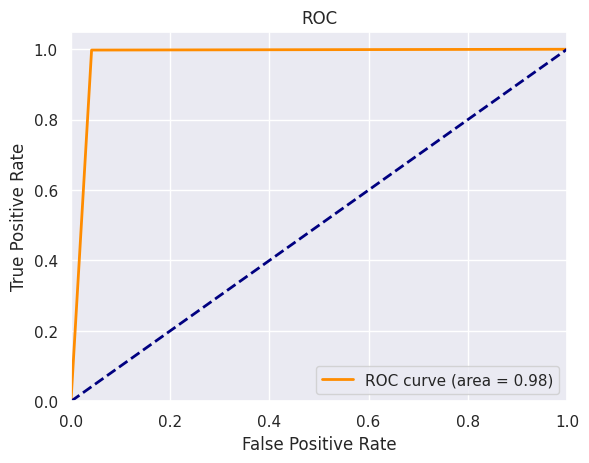

In [41]:
importlib.reload(sys.modules['train'])
from train import final_test
final_test(model, "FF+_align/assignment/test/test_deep_fakes", "DeepFakes" )

In [ ]:
outputs = model(images)
#run the outputs through the softmax function to get the probabilities
outputs = F.softmax(outputs, dim=1)
#get unique values of outputs


In [6]:
path = "/home/anjah/Documents/mag/DeepFakes/DeepFakeXception/FF+_align/assignment/train/Deepfakes"
import os
#count the number of files in the subdirectories
def count_files(path):
    count = 0
    for root, dirs, files in os.walk(path):
        count += len(files)
    return count

count_files(path)


9451

In [7]:
count_files("/home/anjah/Documents/mag/DeepFakes/DeepFakeXception/FF+_align/assignment/train/real")

9471